In [3]:
import numpy as np
import pandas as pd
import itertools as it
from sklearn.model_selection import train_test_split
# from Orange.classification import tree

In [4]:
Data = pd.read_excel('Data.xlsx')
Data = Data.set_index('Date')

In [5]:
X.describe()


,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,Ope_Max,Hig_Max,Low_Max,Vol_Min,Clo_Min,Ope_Min,Hig_Min,Low_Min,Support,Resistance
count,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4955.000000,4956.000000,...,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000
mean,0.644533,0.637100,0.642480,0.645451,0.348032,0.534413,0.747393,0.498667,0.619163,0.512579,...,0.731053,0.730635,0.727456,0.549028,0.731164,0.731053,0.730635,0.727456,0.686203,0.386618
std,0.323364,0.335000,0.325269,0.323861,0.239485,0.233513,0.307204,0.302250,0.227427,0.280354,...,0.291627,0.299795,0.296673,0.288926,0.293263,0.291627,0.299795,0.296673,0.281731,0.273838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387469,0.355543,0.381355,0.386527,0.171744,0.385134,0.616039,0.243193,0.476915,0.301268,...,0.562715,0.554928,0.549538,0.331625,0.562609,0.562715,0.554928,0.549538,0.515406,0.165736
50%,0.734889,0.736370,0.730083,0.737308,0.299520,0.547836,0.901481,0.502618,0.656904,0.528179,...,0.831895,0.840452,0.834677,0.537533,0.835380,0.831895,0.840452,0.834677,0.770847,0.341448
75%,0.940604,0.947531,0.939877,0.943871,0.484242,0.698471,0.968435,0.749181,0.790749,0.729938,...,0.992491,0.998750,1.000000,0.775696,0.995111,0.992491,0.998750,1.000000,0.921953,0.563445
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df_no_nan = Data.dropna(axis=0,how='any')

In [46]:
Y = df_no_nan['Class']
X = df_no_nan.drop('Class', axis = 1)

In [47]:
#Hpyer_Parameters = [[1,2,3,4,5,6,7,8,9,10,11,12]]
#set_parameters = [i for i in it.product(*Hpyer_Parameters)]

Epsilon = 0.2
delta = 0.1

h_aprox = 68  # para #len(set_parameters)
dimVC = 68   # Poner aqui la dimVCand

### $\eta$ minimo estimado

In [48]:
n_est = int(np.ceil((1/Epsilon)*(np.log(h_aprox) + np.log(1/delta))))
X1_tr, X1_ts, Y1_tr, Y1_ts = train_test_split(X, Y, train_size = n_est/X.shape[0], random_state=123)

D:\Usuarios\juanespe\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [49]:
X.shape[0]

4075

In [50]:
n_est

33

In [51]:
X1_ts.shape[0]

4042

In [52]:
X1_tr.shape[0]

33

### $\eta$ minimo optimo

In [53]:
n_opt = int(np.ceil((1/Epsilon)*(np.log(dimVC) + np.log(1/delta))))
X2_tr, X2_ts, Y2_tr, Y2_ts = train_test_split(X, Y, train_size = n_opt/X.shape[0], random_state=123)

# AQUI EL ALGORITMO USANDO X1

In [73]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [55]:
X1_tr.shape[0]

33

In [56]:
Y1_tr.shape[0]

33

In [57]:
reg = LinearRegression().fit(X1_tr, Y1_tr)

In [65]:
y_pred = reg.predict(X1_ts)

In [84]:
type(X1_ts)

pandas.core.frame.DataFrame

In [70]:
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y1_ts, y_pred))
# Explained variance score: 1 is perfect prediction

Coefficients: 
 [-0.98048322 -0.21715576 -0.40922939  0.64796133 -0.94680966 -0.05896242
 -0.45417215 -0.47395538 -1.34069338 -3.45987696 -0.23190032  0.08064047
 -0.82741425 -1.00794308  0.50450883 -0.17565639  1.10089792  1.69726492
 -0.10128724 -1.11722689 -1.3976723   0.17398753  0.29596392 -0.6204434
  1.12995352  0.9388982   0.25068282 -1.06042144 -1.16099571 -1.0638517
 -0.15033365 -0.54413444  2.56376096 -0.71138993  1.34998124  1.07417976
  0.75286404  0.5520399   0.25185434 -0.24120391  0.67707927 -0.32584277
 -0.67575495 -0.58171557  0.22339302 -0.45415252 -2.00854161 -0.66985836
 -0.60568407  1.35303269 -0.60568407  0.63148021  0.64475089  0.64709487
  0.64796133 -0.14911316 -0.90606866 -0.89527132  0.73826022 -0.55760608
 -0.14911316 -0.90606866 -0.89527132  0.73826022 -0.55760608  0.91346341
  0.45361931]
Mean squared error: 2.07


In [71]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y1_ts, y_pred))

Variance score: -3.08


In [76]:
X1_ts.shape[0]

4042

In [77]:
Y1_ts.shape[0]

4042

In [78]:
y_pred.shape[0]

4042

In [82]:
X1_ts.describe()

,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,Ope_Max,Hig_Max,Low_Max,Vol_Min,Clo_Min,Ope_Min,Hig_Min,Low_Min,Support,Resistance
count,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,...,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000,4042.000000
mean,0.590151,0.580125,0.588948,0.592266,0.343932,0.541100,0.722035,0.498136,0.638627,0.519553,...,0.724350,0.722108,0.722150,0.546477,0.727581,0.724350,0.722108,0.722150,0.685035,0.394065
std,0.326320,0.337567,0.329250,0.328098,0.240555,0.233221,0.313279,0.300495,0.225679,0.281017,...,0.294089,0.303491,0.300229,0.288807,0.293748,0.294089,0.303491,0.300229,0.283506,0.278388
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.314558,0.275652,0.310905,0.316159,0.166642,0.391625,0.545347,0.246089,0.506906,0.303283,...,0.547086,0.538374,0.540357,0.333085,0.557324,0.547086,0.538374,0.540357,0.513189,0.167346
50%,0.635326,0.624932,0.636776,0.639180,0.292744,0.553714,0.874787,0.499082,0.678488,0.541378,...,0.824274,0.833815,0.830871,0.534855,0.830984,0.824274,0.833815,0.830871,0.772483,0.350897
75%,0.898771,0.906317,0.900729,0.904168,0.476181,0.702553,0.955141,0.748460,0.806792,0.740024,...,0.984332,0.994269,0.992902,0.773183,0.991433,0.984332,0.994269,0.992902,0.923331,0.574710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


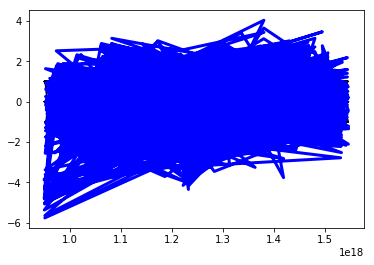

In [102]:
# Plot outputs
plt.plot(X1_ts.index.values.tolist() , Y1_ts,  color='black')
plt.plot(X1_ts.index.values.tolist() , y_pred, color='blue', linewidth=3)


plt.show()

# AQUI EL ALGORITMO USANDO X2

In [37]:
n_opt

33